# Impeller Stress and Frequency Prediction

## Polynominal Linear Regression

<h2 style="color:cyan">Import Libraries</h2>

In [251]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

<h2 style="color:cyan">Read Data</h2>

In [179]:
filename = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20stress%20and%20freq.csv'
df = pd.read_csv(filename)

<h2 style="color:cyan">Data Exploring</h2>

In [180]:
df.head()

,No,Model,Speed,D2,DB,tm,ts,ti,tv,Rib,...,isStraightSide,hasRimout,hasRimIn,hasVaneRimIn,hasVaneRimOut,Sm,Ss,Sv,Si,Frequency
0,1,H,3.575,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,0,0,216.6,292.3,294.5,0,100.46
1,2,H,1.785,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,0,0,53.9,72.9,73.5,0,86.74
2,3,H,1.185,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,0,0,23.8,32.1,32.4,0,83.93
3,4,H,0.890,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,0,0,13.4,18.1,18.2,0,82.90
4,5,H,1.785,0.755,0.2,6.0,4.5,0,3.2,1,...,0,0,0,0,0,54.5,73.6,74.2,0,86.35


In [101]:
df.dtypes

No                  int64
Model              object
Speed             float64
D2                float64
DB                float64
tm                float64
ts                float64
ti                  int64
tv                float64
Rib                 int64
hasMouthRing        int64
isStraightSide      int64
hasRimout           int64
hasRimIn            int64
hasVaneRimIn        int64
hasVaneRimOut       int64
Sm                float64
Ss                float64
Sv                float64
Si                  int64
Frequency         float64
dtype: object

In [181]:
df.shape

(115, 21)

In [182]:
df.describe()

,No,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,hasRimout,hasRimIn,hasVaneRimIn,hasVaneRimOut,Sm,Ss,Sv,Si,Frequency
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0,115.000000,115.000000,115.000000,115.000000,115.0,115.000000
mean,57.695652,1.797870,1.390261,0.392174,9.247826,6.526957,0.0,4.228696,1.930435,0.043478,0.043478,0.086957,0.086957,0.0,0.060870,228.802087,325.287565,377.671652,0.0,54.381722
std,32.974518,0.437273,0.472797,0.171821,3.051728,2.560815,0.0,1.045270,0.722104,0.204824,0.204824,0.283004,0.283004,0.0,0.240137,219.089192,295.558489,383.426253,0.0,18.796230
min,1.000000,0.890000,0.755000,0.200000,4.500000,3.200000,0.0,3.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,13.400000,18.100000,18.200000,0.0,31.880000
25%,29.500000,1.785000,1.000000,0.200000,6.000000,4.500000,0.0,3.600000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,71.250000,107.350000,116.100000,0.0,41.055000
50%,58.000000,1.785000,1.500000,0.410000,9.000000,4.500000,0.0,4.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,233.500000,328.900000,324.000000,0.0,45.220000
75%,85.500000,1.785000,1.750000,0.580000,12.000000,9.000000,0.0,4.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,290.300000,450.850000,490.300000,0.0,64.955000
max,114.000000,3.575000,2.000000,0.580000,18.000000,15.000000,0.0,9.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1616.500000,1943.000000,2949.000000,0.0,112.680000


<h2 style="color:cyan">Drop unused column</h2>

In [183]:
df.drop(['No', 'Model'], axis=1, inplace=True)

In [184]:
df.head()

,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,hasRimout,hasRimIn,hasVaneRimIn,hasVaneRimOut,Sm,Ss,Sv,Si,Frequency
0,3.575,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,216.6,292.3,294.5,0,100.46
1,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,53.9,72.9,73.5,0,86.74
2,1.185,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,23.8,32.1,32.4,0,83.93
3,0.890,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,13.4,18.1,18.2,0,82.90
4,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,54.5,73.6,74.2,0,86.35


<h2 style="color:cyan">Check correlation between columns</h2>

In [185]:
df.corr()

,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,hasRimout,hasRimIn,hasVaneRimIn,hasVaneRimOut,Sm,Ss,Sv,Si,Frequency
Speed,1.000000,0.000589,0.000202,-0.002510,-0.002702,NaN,-0.004836,-0.005335,-0.006302,-0.006302,-0.009122,-0.009122,NaN,-0.007526,0.634075,0.663342,0.603304,NaN,0.248641
D2,0.000589,1.000000,0.969688,0.853575,0.737936,NaN,0.532982,0.411661,0.004864,0.004864,0.007040,0.007040,NaN,0.079052,0.636652,0.579739,0.641746,NaN,-0.650927
DB,0.000202,0.969688,1.000000,0.883014,0.785708,NaN,0.515515,0.353316,0.002276,0.002276,0.003294,0.003294,NaN,0.081804,0.610950,0.542262,0.614709,NaN,-0.497260
tm,-0.002510,0.853575,0.883014,1.000000,0.701573,NaN,0.430864,0.288525,-0.017389,-0.017389,-0.025171,-0.025171,NaN,0.051054,0.487843,0.466485,0.540207,NaN,-0.350143
ts,-0.002702,0.737936,0.785708,0.701573,1.000000,NaN,0.311982,0.225400,-0.018978,-0.018978,-0.027470,-0.027470,NaN,0.054366,0.471605,0.288472,0.459910,NaN,-0.321585
ti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tv,-0.004836,0.532982,0.515515,0.430864,0.311982,NaN,1.000000,0.208371,-0.034559,-0.034559,-0.050024,-0.050024,NaN,-0.010514,0.343640,0.417054,0.289948,NaN,-0.423231
Rib,-0.005335,0.411661,0.353316,0.288525,0.225400,NaN,0.208371,1.000000,-0.038679,-0.038679,-0.055988,-0.055988,NaN,0.176393,0.230202,0.233458,0.171260,NaN,-0.479367
hasMouthRing,-0.006302,0.004864,0.002276,-0.017389,-0.018978,NaN,-0.034559,-0.038679,1.000000,-0.045455,-0.065795,-0.065795,NaN,-0.054278,-0.010636,-0.040665,-0.018972,NaN,-0.018566
isStraightSide,-0.006302,0.004864,0.002276,-0.017389,-0.018978,NaN,-0.034559,-0.038679,-0.045455,1.000000,-0.065795,-0.065795,NaN,-0.054278,-0.014272,-0.015945,-0.019017,NaN,-0.019387


In [277]:
# Remove speed for impeller stress prediction data - speed effect will be estimated separately
df_stress = df.loc[df['Speed'] == 1.785]
df_stress.head(10)

,Speed,D2,DB,tm,ts,ti,tv,Rib,hasMouthRing,isStraightSide,hasRimout,hasRimIn,hasVaneRimIn,hasVaneRimOut,Sm,Ss,Sv,Si,Frequency
1,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,53.9,72.9,73.5,0,86.74
4,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,54.5,73.6,74.2,0,86.35
5,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,55.0,74.3,74.9,0,86.02
6,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,53.9,72.9,73.5,0,82.51
7,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,53.9,72.9,73.5,0,78.06
8,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,0,0,0,53.9,72.9,73.5,0,73.33
9,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,1,0,0,0,52.1,75.9,74.9,0,82.92
10,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,0,1,0,0,51.3,60.6,73.7,0,86.16
11,1.785,0.755,0.2,6.0,4.5,0,3.2,1,0,0,1,1,0,0,53.5,63.9,73.8,0,82.38
12,1.785,0.755,0.2,6.0,4.5,0,3.2,2,0,0,0,0,0,0,53.3,72.6,68.2,0,86.66


<h2 style="color:cyan">Data exploratory analysis</h2>

In [278]:
# Input parameters
x_train_stress = df_stress[['D2','DB','tm','ts','tv','Rib','hasMouthRing','isStraightSide','hasRimout','hasRimIn','hasVaneRimOut']]
x_train_stress.head()

,D2,DB,tm,ts,tv,Rib,hasMouthRing,isStraightSide,hasRimout,hasRimIn,hasVaneRimOut
1,0.755,0.2,6.0,4.5,3.2,1,0,0,0,0,0
4,0.755,0.2,6.0,4.5,3.2,1,0,0,0,0,0
5,0.755,0.2,6.0,4.5,3.2,1,0,0,0,0,0
6,0.755,0.2,6.0,4.5,3.2,1,0,0,0,0,0
7,0.755,0.2,6.0,4.5,3.2,1,0,0,0,0,0


In [279]:
# Output parameters
ym_train_stress = df_stress[['Sm','Ss','Sv','Si','Frequency']]
ym_train_stress.head()

,Sm,Ss,Sv,Si,Frequency
1,53.9,72.9,73.5,0,86.74
4,54.5,73.6,74.2,0,86.35
5,55.0,74.3,74.9,0,86.02
6,53.9,72.9,73.5,0,82.51
7,53.9,72.9,73.5,0,78.06


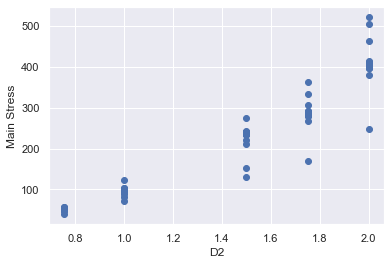

In [283]:
# plot main stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sm)
plt.xlabel('D2')
plt.ylabel('Main Stress')
plt.show()

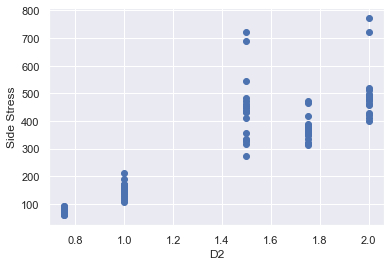

In [282]:
# plot side stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Ss)
plt.xlabel('D2')
plt.ylabel('Side Stress')
plt.show()

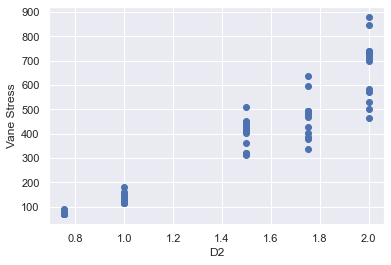

In [281]:
# plot vane stress Vs impeller D2
plt.scatter(x_train_stress.D2,ym_train_stress.Sv)
plt.xlabel('D2')
plt.ylabel('Vane Stress')
plt.show()

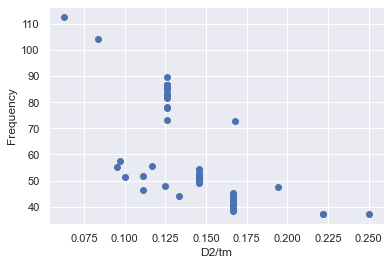

In [280]:
# plot frequency Vs D2/tm
plt.scatter(x_train_stress.D2/x_train_stress.tm,ym_train_stress.Frequency)
plt.xlabel('D2/tm')
plt.ylabel('Frequency')
plt.show()

<h2 style="color:cyan">Function for Polynominal Regression</h2>

In [268]:
df_coef = pd.DataFrame()  # To save coefficients of fitting function

def polyEstimate(x_train_sm, y_train_sm): 

    # Transform input data into polynominal features
    x_train_sm_transform = PolynomialFeatures(degree=2).fit_transform(x_train_sm)
    x_train_sm_transform.shape  # 1, x, y, x2, xy, y2

    # Create a linear regression model
    poly = LinearRegression()
    poly.fit(x_train_sm_transform, y_train_sm)  # transformed x data can be used as a linear regression model

    # Predict value of train data
    yhat_sm = poly.predict(x_train_sm_transform)

    # Plot predict and true data
    df_result = pd.DataFrame(list(zip(y_train_sm,yhat_sm)), columns=['True_Value','Predict_Value'])
    fig = px.scatter(df_result, x='True_Value', y='Predict_Value', trendline='ols', height=400, width=500)
    fig.update_layout(margin=dict(l=10,r=10,t=20,b=10))
    fig.show()

    # Model Evaluation
    print("Residual sum of squares (MSE): %.2f" % np.mean((y_train_sm - yhat_sm) ** 2))
    print("R2-score: %.2f" % r2_score(y_train_sm , yhat_sm) )

    # Extract the coefficient
    columns_name = (PolynomialFeatures(degree=2).fit(x_train_sm).get_feature_names(x_train_sm.columns))
    columns_name = columns_name[1:]
    columns_name.append("Intercept")

    data = poly.coef_[1:]
    data = np.append(data, poly.intercept_).reshape(1,data.shape[0]+1)

    df_coef = pd.DataFrame(data, columns=columns_name)
    print('Coefficent shape:', df_coef.shape)

<h2 style="color:cyan">Polynomial Regression Model - Main Stress - 2 inputs</h2>

In [269]:
# Sm Vs impeller tm & impeller D2
polyEstimate(df_stress[['D2','tm']], ym_train_stress.Sm)

Residual sum of squares (MSE): 294.90
R2-score: 0.98
Coefficent shape: (1, 6)


<h2 style="color:cyan">Polynomial Regression Model - Side Stress - 4 inputs</h2>

In [270]:
# D2, tm, tv, ts
polyEstimate(df_stress[['D2','tm','tv','ts']], ym_train_stress.Sm)

Residual sum of squares (MSE): 145.06
R2-score: 0.99
Coefficent shape: (1, 15)


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Main Stress</h2>

In [271]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sm)

Residual sum of squares (MSE): 106.95
R2-score: 0.99
Coefficent shape: (1, 78)


In [178]:
df_coef.to_clipboard()

<h2 style="color:cyan">Polynomial Regression Model - All inputs - Side stress</h2>

In [272]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Ss)

Residual sum of squares (MSE): 420.13
R2-score: 0.99
Coefficent shape: (1, 78)


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Vane stress</h2>

In [273]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Sv)

Residual sum of squares (MSE): 365.48
R2-score: 0.99
Coefficent shape: (1, 78)


<h2 style="color:cyan">Polynomial Regression Model - All inputs - Frequency</h2>

In [274]:
# All parameters
polyEstimate(x_train_stress, ym_train_stress.Frequency)

Residual sum of squares (MSE): 2.25
R2-score: 0.99
Coefficent shape: (1, 78)


<h2 style="color:cyan">Frequency by Rotating Speed</h2>

In [217]:
filename = 'https://raw.githubusercontent.com/sonpn82/Impeller-stress-prediction/main/Impeller%20stress%20prediction%20database%20-%20frequency.csv'
df_fre = pd.read_csv(filename)

In [219]:
df_fre.head()

,D2,tm,a,b
0,0.755,6,1.257014,0.929486
1,1.500,9,1.362853,6.141204
2,1.000,6,1.372452,5.488837
3,2.000,12,1.198952,6.861394
4,1.750,12,1.452272,3.417123


<h3 style="color:cyan">Fitting curve: y = ax&#178 + bx with</h3>
<ul>- x: rotating frequency</ul>
<ul>- y: natural frequency</ul>

<h3 style="color:cyan">c = Y - aX&#178 - bX with</h3> 
<ul>- X: rotating frequency at standard value of 1.785</ul>
<ul>- Y: Predicted frequency at polynomial regression - all input - frequecy</ul>

In [221]:
ym_train_fre = df_fre[['a','b']]

In [275]:
polyEstimate(df_fre[['D2','tm']], ym_train_fre.a)

Residual sum of squares (MSE): 0.00
R2-score: 1.00
Coefficent shape: (1, 6)


In [276]:
polyEstimate(df_fre[['D2','tm']], ym_train_fre.b)

Residual sum of squares (MSE): 0.00
R2-score: 1.00
Coefficent shape: (1, 6)


In [ ]:
# To be continued with test data 
# Train data show very good fit with current function